## Clasificación con datos desbalanceados

Estrategias para resolver desequilibrio de datos en Python con la librería [imbalanced-learn](https://imbalanced-learn.readthedocs.io/en/stable/).

### Descripción de los datos
El dataset contiene las transacciones de tarjeta de crédito de dos días realizadas en septiembre de 2013 por tarjetahabientes europeos. El dataset es altamente desbalanceado con un bajo porcentaje de transacciones fraudulentas entre numerosos registros de transacciones normales. La clase positiva (fraudes) representa el 0.172% (492 fraudes de 284,807 transacciones) del total de transacciones.

Los rasgos `V1`, `V2`, .... `V28` son los componentes principales (PC) obtenidos con PCA, los únicos rasgos que no han sido transformados con PCA son `Time` y `Amount`. El rasgo `Time` contiene la estampa de tiempo en segundos de cada transacción a partir de la primera transacción. El rasgo `Class` es la variable objetivo con valor 1 en caso de fraude y 0 en caso contrario.

### Requerimientos
Instalar la librería de Imbalanced Learn:<br>
`pip install -U imbalanced-learn`

## 1.0 Cargar librerías

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from statsmodels.graphics.gofplots import qqplot

## 2.0 Cargar dataset
Crear un dataframe para almacenar el dataset.<br>
El dataset se encuentra disponible en: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [76]:
df = pd.read_csv('data\creditcard.csv') 

### 2.1 Explorar el dataframe
Visualizar 5 muestras aleatorias

In [84]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28465,35022.0,1.070180,-1.188171,1.023536,-0.638826,-1.303915,0.781602,-1.323661,0.430219,-0.322198,...,0.460637,1.238179,-0.122945,-0.239890,0.237628,-0.011887,0.061847,0.021955,91.00,0
242963,151733.0,1.993901,-0.145172,-0.244547,0.386809,-0.546750,-0.710254,-0.361864,-0.161876,0.969054,...,-0.119498,-0.143389,0.366689,-0.021665,-0.411384,-0.616349,0.046311,-0.028529,1.00,0
141247,84199.0,-0.638658,0.765918,1.455059,-0.362142,0.757088,1.459236,0.244993,0.701391,-0.615203,...,-0.061594,-0.017693,0.096616,-1.048241,-0.551826,0.183754,0.330571,0.095107,2.97,0
254866,156950.0,1.933651,0.525814,-2.048118,1.427939,0.741658,-0.878128,0.327149,-0.118318,0.013861,...,-0.318128,-0.899824,0.208705,-0.675869,-0.117062,-0.915390,0.028225,-0.003056,22.41,0
104220,68965.0,-10.934891,4.457323,-5.301625,0.058187,-5.231223,-1.050543,-2.594930,4.212623,1.166266,...,-0.021467,-0.753833,-0.533345,0.481376,0.366479,-0.246962,-4.228058,-1.473684,19.62,0


Identificar los nombres de todas las columnas del dataframe

In [85]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## 3.0 Limpieza de datos
Los datasets pueden tener valores que no aparecen por una serie de razones, como observaciones que no se registraron y corrupción de datos. [Ref1](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b), [Ref2](https://machinelearningmastery.com/handle-missing-data-python/)
### 3.1 Detectar datos faltantes en el dataframe

In [86]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [87]:
#Contar valores núlos por rasgo
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [88]:
#Para un chequeo rápido de todo el dataframe
df.isnull().values.any()

False

## 4.0 Desbalance de clases
Ver número de filas y muestras por clase

In [89]:
print(df.shape)
print(pd.value_counts(df['Class']))

(284807, 31)
0    284315
1       492
Name: Class, dtype: int64


Visualizar desbalance mediante gráfica de barras

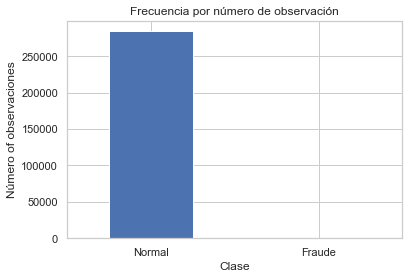

In [90]:
count_classes = pd.value_counts(df['Class'])
count_classes.plot(kind = 'bar',rot=0)
LABELS = ['Normal','Fraude']
plt.xticks(range(2), LABELS)
plt.title("Frecuencia por número de observación")
plt.xlabel("Clase")
plt.ylabel("Número of observaciones");

<div class="alert alert-block alert-success">
De la gráfica anterior se puede observar que los datos están sesgados hacia la clase normal, es decir, transacciones no fradulentas.
</div>

Gráfica de barras con seaborn

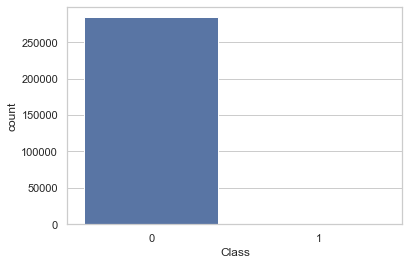

In [91]:
sns.countplot(df['Class']);

Determinar la cantidad de muestras normales y fraudulentas

In [92]:
print('Casos normales:',len(df[df['Class'] == 0]))
print('Casos de fraude:',len(df[df['Class'] == 1]))

Casos normales: 284315
Casos de fraude: 492


In [93]:
#También se puede utilizar la función value_counts()
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [94]:
#Proporción de transacciones normales y fradulentas
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

## 5.0 Análisis de exploratorio de datos (EDA)
### 5.1 Analizar el rasgo `Time`

In [95]:
t=df['Time']

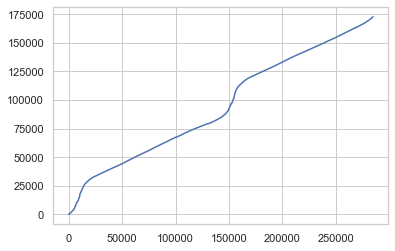

In [96]:
plt.plot(t);

Convertir el tiempo de segundos a horas para facilitar la interpretación.

In [97]:
t=t/3600

¿Cuál es la hora de la última transacción, en días?

In [98]:
print(t.max()/24)

1.9999074074074075


Crear un histograma de las transacciones durante las 48 horas:

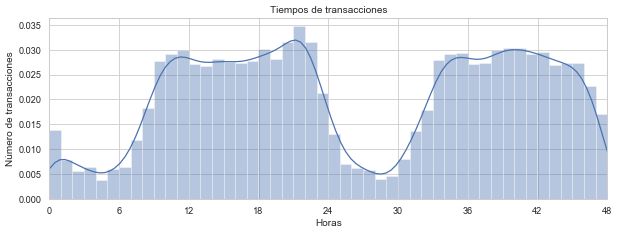

In [99]:
plt.figure(figsize=(12,4), dpi=60)
sns.distplot(t, bins=48, kde=True);
plt.xlim([0,48])
plt.xticks(np.arange(0,49,6))
plt.xlabel('Horas')
plt.ylabel('Número de transacciones')
plt.title('Tiempos de transacciones');

Obtener el tiempo entre transacciones (segundos):

In [100]:
tdif=df['Time']-df['Time'].shift()

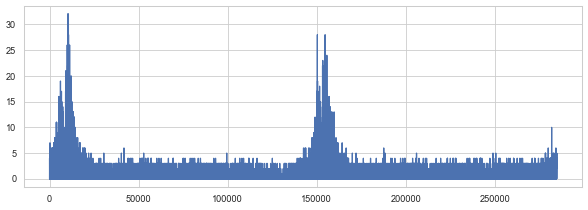

In [101]:
plt.figure(figsize=(12,4), dpi=60)
plt.plot(tdif);

<div class="alert alert-block alert-warning">
<b>Nota</b>: Observar que hay dos lapsos con duraciones muy largas
</div> 

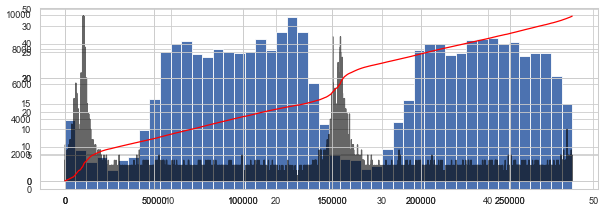

In [102]:
fig=plt.figure(figsize=(12,4), dpi=60)
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
ax3=fig.add_subplot(111, label="3", frame_on=False)
ax1.hist(t,bins=48);
ax2.plot(tdif,color='black', alpha=0.6);
ax3.plot(t,color='red');

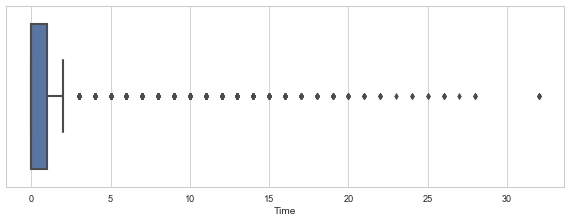

In [103]:
fig=plt.figure(figsize=(12,4), dpi=60)
sns.set(style="whitegrid")
sns.boxplot(tdif, linewidth=2.5);

<div class="alert alert-block alert-warning">
<b>Nota</b>: Observar outliers que muestra el diagrama de caja y bigotes
</div>

Analizar el tiempo entre transacciones de acuerdo a la clase, pero primero agregar el rasgo del tiempo entre transacciones al dataframe 

In [104]:
df['Time_Difference'] = df['Time']-df['Time'].shift()
df.groupby('Class').Time_Difference.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284314.0,0.605869,1.051233,0.0,0.0,0.0,1.0,32.0
1,492.0,1.087398,1.870144,0.0,0.0,0.0,1.0,16.0


Mostrar gráficamente lo anterior mediante diagrama de caja y bigotes

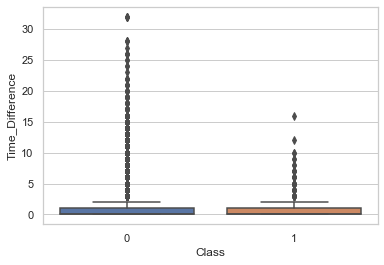

In [105]:
sns.boxplot(x="Class", y="Time_Difference",data=df)

<div class="alert alert-block alert-warning">
Se observa que el rango intercuartil (IQR) de ambas clases es similar; además, los valores atípicos de las diferencias de tiempo ocurren tanto en transacciones legítimas como fraudulentas. Sin embargo, algunos valores atípicos pueden indicar fraude, ya que el fraude a menudo ocurre en momentos en que hay pocas transacciones.
</div>

Ref.
1. [Two (or more) graphs in one plot with different x-axis AND y-axis scales in python](https://stackoverflow.com/questions/42734109/two-or-more-graphs-in-one-plot-with-different-x-axis-and-y-axis-scales-in-pyth)
1. [Gráficos con eje X común pero eje Y diferente: usando twinx](https://riptutorial.com/es/python/example/31794/graficos-con-eje-x-comun-pero-eje-y-diferente--usando-twinx---)

### 5.2 Analizar el rasgo `Amount`

Resumen de estadísticas

In [106]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Se puede verificar el 75% de las transacciones están son con cantidades menores a $77.00. La siguiente figura muestra el histograma de los montos de las transacciones.

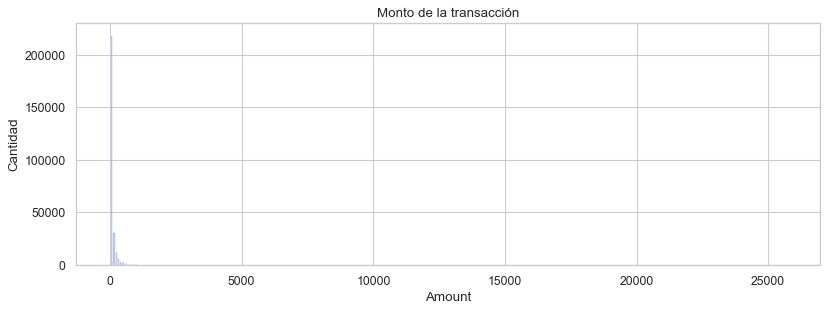

In [107]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Amount'], bins=300, kde=False)
plt.ylabel('Cantidad')
plt.title('Monto de la transacción');

El histograma es difícil de leer debido a algunos valores atípicos que no podemos ver. Un diagrama de caja y bigotes mostrará los valores atípicos:

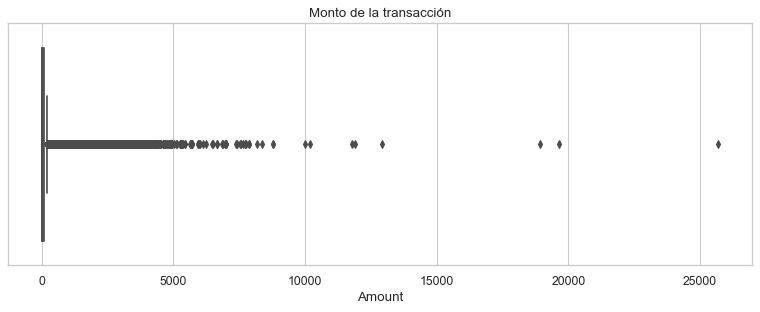

In [108]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['Amount'])
plt.title('Monto de la transacción');

Se puede ver que no hay valores atípicos a la izquierda y muchos valores atípicos a la derecha. Por lo tanto, las cantidades están muy sesgadas a la derecha. Para asegurar se puede calcular la asimetría:

In [109]:
df['Amount'].skew()

16.977724453761024

Es un sesgo grande hacia la derecha. Hay que usar una transformación de potencia para aproximar los montos de las transacciones a una distribución normal. Se usará la transformación Box-Cox en SciPy, pero algunas de las cantidades son cero, así que primero hay que cambiar las cantidades para que sean positivas. Se cambiará por una cantidad muy pequeña de $10^{-9}$.

In [110]:
#Número de ejemplos con Amount = 0
(df['Amount'] == 0).sum()


1825

In [111]:
#Sumar 1^-9 a la columna Amount de todas las muestras
df.loc[:,'Amount'] = df['Amount'] + 1e-9

### 5.2.1 Realizar la transformación Box-Cox al rasgo `Amount`: <br>
> 1. https://es.wikipedia.org/wiki/Transformación_Box-Cox
> 1. https://www.youtube.com/watch?v=s0XUDc_1tLM

#### Antes de la gausianización

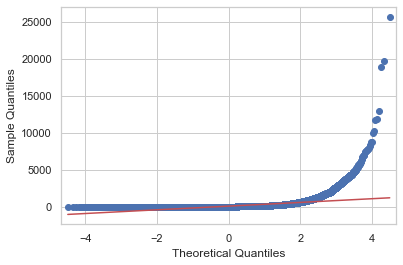

In [114]:
qqplot(df['Amount'], line='s')
plt.show()

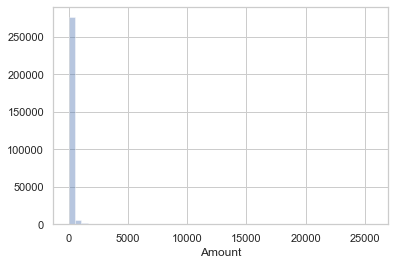

In [115]:
sns.distplot(df['Amount'], bins=48, kde=False);

In [116]:
df['Amount'].kurtosis()

845.0926455465277

Gausianización

In [117]:
df.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(df['Amount'], alpha=0.01)

Después de la gausianización

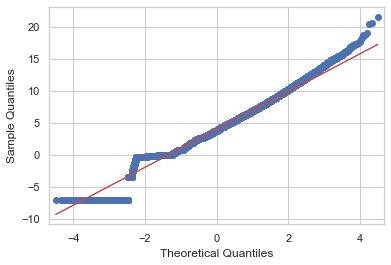

In [118]:
qqplot(df['Amount'], line='s')
plt.show()

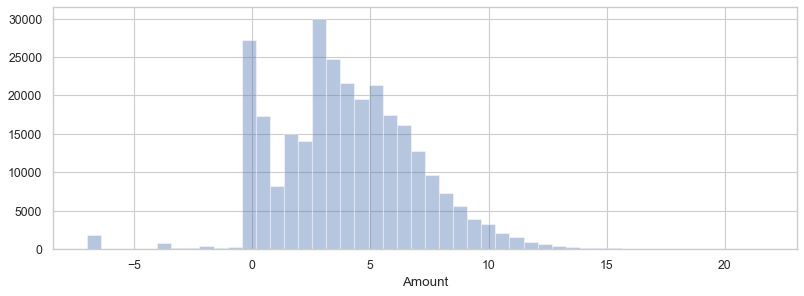

In [119]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['Amount'], bins=48, kde=False);

In [120]:
df['Amount'].kurtosis()

0.8008331672684355

Mucho mejor. La distribución parece ser bimodal, lo que sugiere una división entre compras "pequeñas" y "grandes". De esta forma, la transformación de potencia eliminó la mayor parte de la asimetría de la variable `Amount`. Ahora veamos las estadísticas descriptivas de las cantidades transformadas:

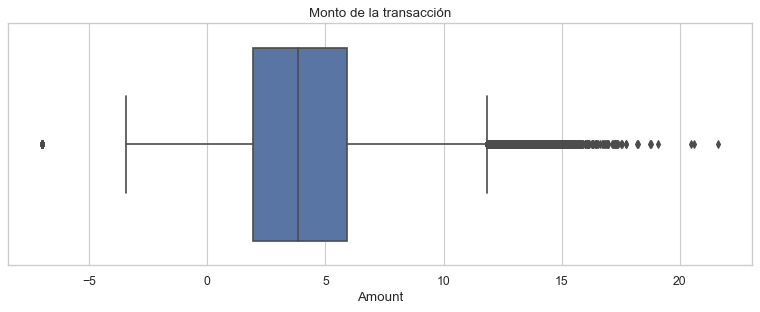

In [121]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['Amount'])
plt.title('Monto de la transacción');

### 5.3 `Time` vs `Amount` <br>
¿Existe una relación entre los montos de la transacción y la hora del día? Crear un histograma conjunto de cajas hexagonales. Para este gráfico, se convierte cada tiempo de transacción a la hora del día en que ocurrió.

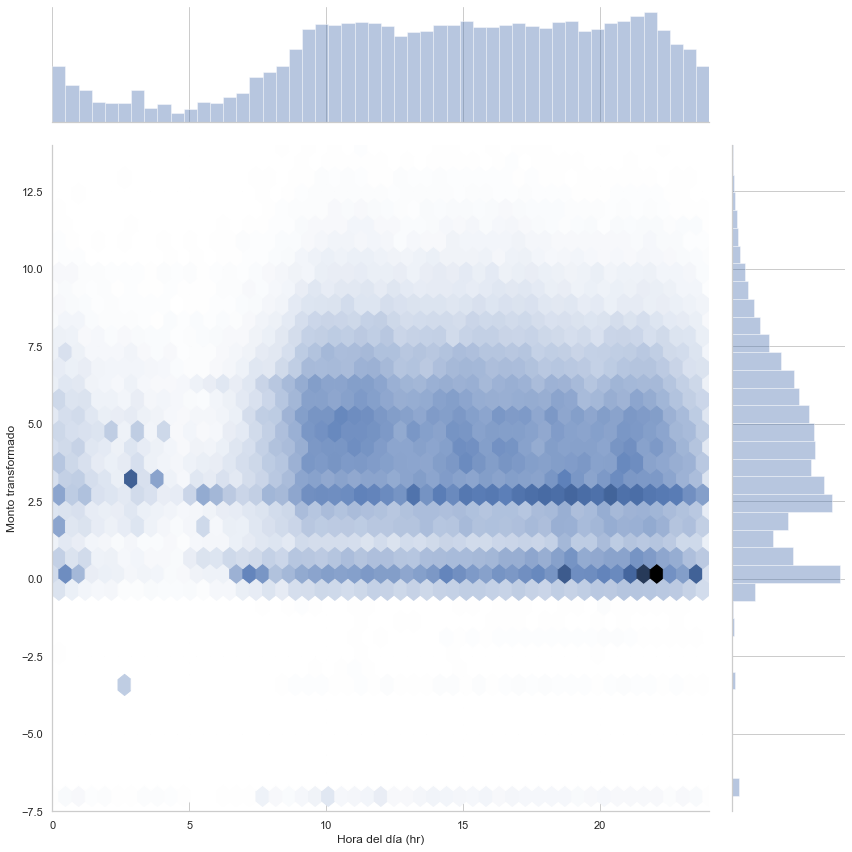

In [122]:
sns.jointplot(t.apply(lambda x: x % 24), df['Amount'], kind='hex', stat_func=None, height=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Hora del día (hr)','Monto transformado');

Los montos de las transacciones parecen estar distribuidos de manera similar a lo largo del día. Sin embargo, en las primeras horas del día, alrededor de las 5-7 AM, los montos de alrededor de 2.5 son las más comunes (recuerde que este es un valor transformado de Box-Cox). Quizás las personas están comprando su café de la mañana

### 5.4 `V1` vs `V28` 
Comparar las estadísticas descriptivas de los rasgos `V1`-`V28` transformados con PCA.

In [123]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [124]:
#Tabla completa de estadísticas descriptivas:
df[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


Es complicado interpretar esta tabla, así que vamos a hacer algunas visualizaciones. Empezaremos por graficar las medias:

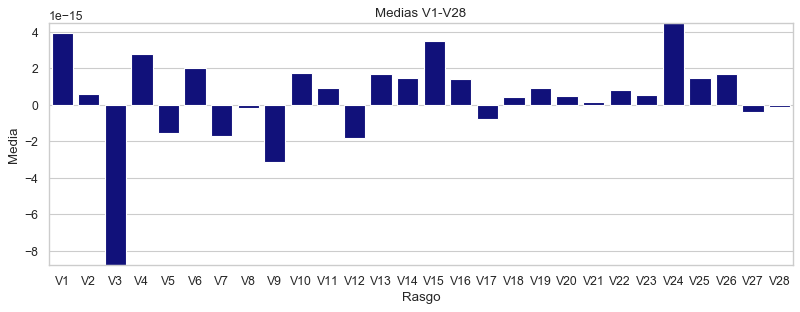

In [125]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].mean(), color='darkblue')
plt.xlabel('Rasgo')
plt.ylabel('Media')
plt.title('Medias V1-V28');

Todos los `V1`-`V28` tienen aproximadamente una media cero. Ahora graficar las desviaciones estándar:

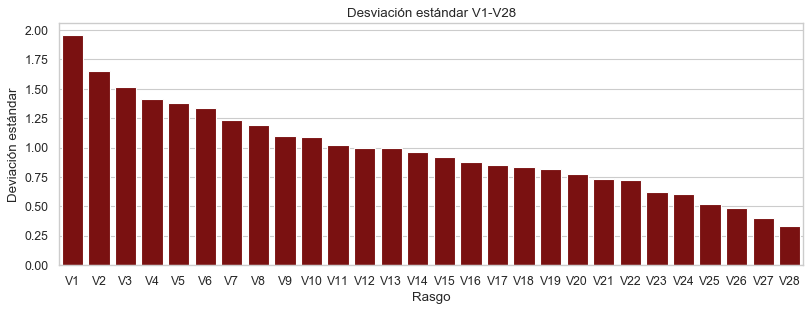

In [126]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].std(), color='darkred')
plt.xlabel('Rasgo')
plt.ylabel('Deviación estándar')
plt.title('Desviación estándar V1-V28');

Las componentes principales tienen aproximadamente una varianza unitaria, que oscila entre ~0.3 y ~1.9. A continuación, se grafican las asimetrías:

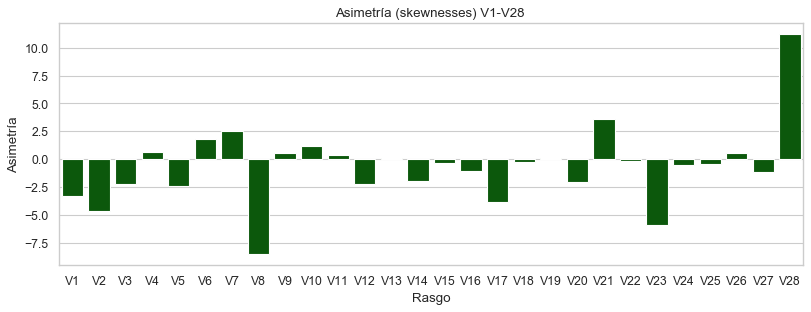

In [127]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].skew(), color='darkgreen')
plt.xlabel('Rasgo')
plt.ylabel('Asimetría')
plt.title('Asimetría (skewnesses) V1-V28 ');

Algunas de las PC están significativamente sesgadas. Graficar un histograma de una de las variables sesgadas, por ej. `V8`, para ver la distribución en detalle.

Text(0.5, 1.0, 'V8')

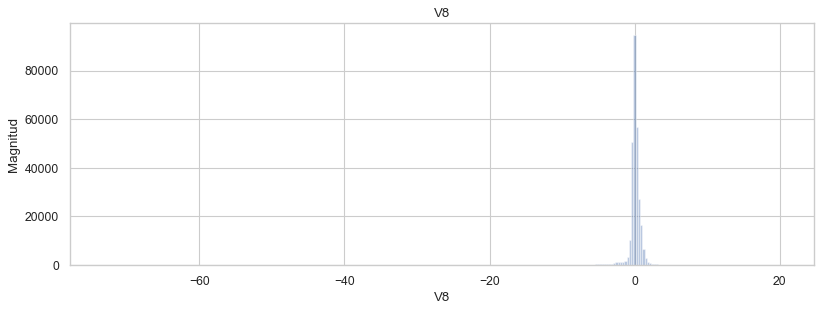

In [128]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(df['V8'], bins=300, kde=False)
plt.ylabel('Magnitud')
plt.title('V8')

El histograma no muestra valores atípicos. Probar con un diagram de caja y bigotes:

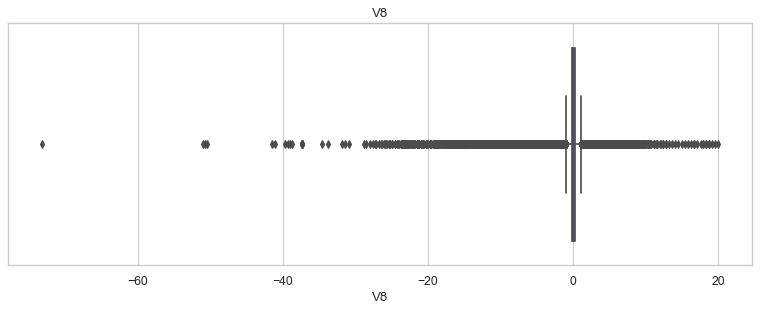

In [129]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(df['V8'])
plt.title('V8');

<div class="alert alert-block alert-info">
El diagrama de caja también es difícil de interpretar debido al gran número de valores atípicos, lo que indica una alta curtosis en V8. Esto sugiere graficar las curtosis de las PC. El método de kurtosis empleado en Pandas es la definición de Fisher, donde la distribución normal estándar tiene kurtosis 0.
</div>

Observar la escala logarítmica en el eje $y$ en la gráfica siguiente:

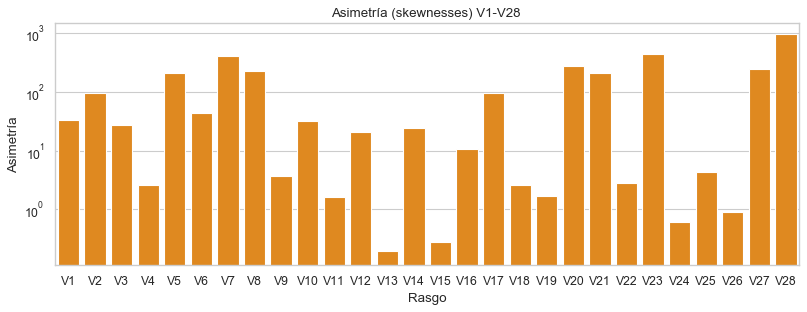

In [130]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=df[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Rasgo')
plt.ylabel('Asimetría')
plt.title('Asimetría (skewnesses) V1-V28 ');

Se ha descubierto que muchas de las PC son de cola pesada (heavy-tailed). El gran número de valores atípicos en `V1`-`V28` hace necesario considerar estadísticas descriptivas robustas. Graficar las medianas:

Text(0.5, 1.0, 'Mediana de V1-V28')

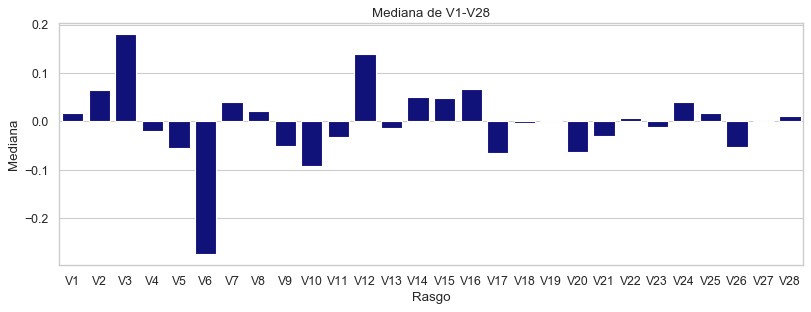

In [131]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].median(), color='darkblue')
plt.xlabel('Rasgo')
plt.ylabel('Mediana')
plt.title('Mediana de V1-V28')

Las medianas también son muy cercanas a cero. A continuación, analicemos los rangos intercuartiles (IQR)*:
* Pandas no tiene un método IQR incorporado, pero se puede usar el método de cuantiles para calcular el IQR.

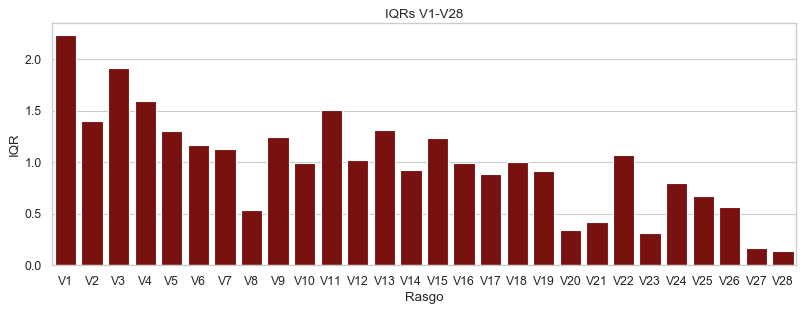

In [132]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=df[pca_vars].quantile(0.75) - df[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Rasgo')
plt.ylabel('IQR')
plt.title('IQRs V1-V28');

### 5.5 Matriz de correlaciones

In [ ]:
#Primero eliminar rasgo adicional
df=df.drop(['Time_Difference'],axis=1)

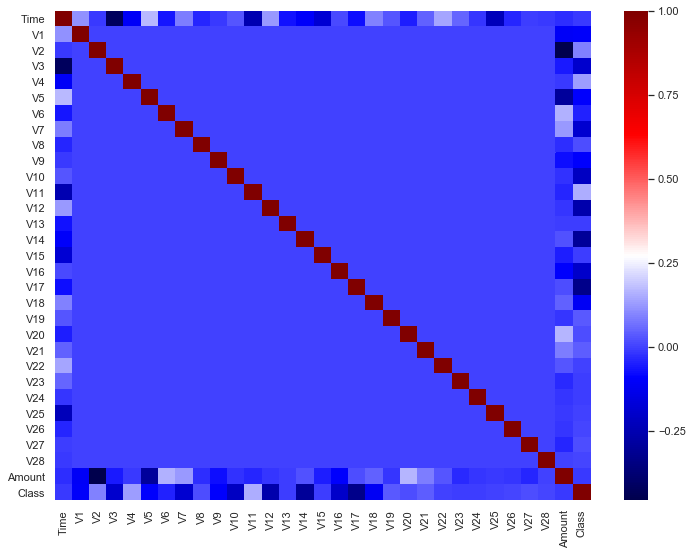

In [159]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, cmap='seismic')
plt.show()

Encontrar los rasgos gausianizados que presentan la mayor correlación

## 6. Modelado
Ahora estamos listos para crear modelos de aprendizaje automático para predecir si una transacción es fraudulenta.<br> Entrenaremos a los siguientes modelos:
1. Regresión logística
1. Clasificador de soporte vectorial

### 6.1 Clasificación con datos desbalanceados
Utilizar la regresión logística para hacer la clasificación de estos datos desbalanceados.

#### 6.1.1 Preparación de datos
Antes de ejecutar el algoritmo, normalizar el rasgo `Amount` y eliminar el rasgo `Time`.

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df=df.drop(['Time','Amount'],axis=1)
X=df.drop(['Class'],axis=1)
y=df['Class']

> #### Notas sobre el uso de StandardScaler
__`StandardScaler`__ : Transforma los datos de tal manera que su media sea 0 y su desviación estándar 1. En resumen, estandariza los datos. La estandarización es útil para datos que tienen valores negativos. Ajusta los datos a una distribución normal. Es más útil en la clasificación que en la regresión. 
StandardScaler estandariza un rasgo restando la media y luego escalándolo a una varianza unitaria. La desviación unitaria significa dividir todos los valores por la desviación estándar.<br><br>
__`Normalizer`__ : Comprime los datos entre 0 y 1, esto es, efectua una normalización. Debido a la disminución del rango y la magnitud, los gradientes en el proceso de entrenamiento no se desbordarán y no se obtendrán valores más altos de pérdida. Es más útil en la regresión que en la clasificación.

#### 6.1.2 Particionar dataset (entrenamiento y prueba)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

#### 6.1.3 Aplicar el algoritmo de regresión logística

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score,accuracy_score,precision_score,f1_score,confusion_matrix
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

#### 6.1.4 Evaluación del algoritmo

In [167]:
conf = confusion_matrix(y_test,y_pred)
print('Matriz de confusión:')
print(conf)
print('Exactitud =',accuracy_score(y_test,y_pred))
print('Sensibilidad [clase 0 , clase 1] =',recall_score(y_test,y_pred,average=None))
print ('Precision =', precision_score(y_test, y_pred, average=None))
print ('F1 =', f1_score(y_test, y_pred, average=None))

Matriz de confusión:
[[85286    10]
 [   54    93]]
Exactitud = 0.9992509626300574
Sensibilidad [clase 0 , clase 1] = [0.99988276 0.63265306]
Precision = [0.99936724 0.90291262]
F1 = [0.99962493 0.744     ]


#### 6.1.5 Observaciones:
1. __Exactitud__: Podría creerse que el algoritmo está funcionando extremadamente bien. Pero no es verdad. Debido a que la mayoría de las etiquetas son 0, incluso con predicciones aleatorias dan una exactitud del 99%. Por lo tanto, se necesita una mejor métrica para entender el rendimiento del modelo.
1. __Sensibilidad__: Como se puede observar en los resultados, la sensibilidad de 1 es sólo 0.61904762 comparado con el 99% de 0. Así que el modelo no está haciendo un buen trabajo en el reconocimiento de fraudes. Esto muestra cómo los datos desbalanceados están afectando la precisión del modelo.

In [165]:
#La función classification_report nos proporciona las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.63      0.74       147

    accuracy                           1.00     85443
   macro avg       0.95      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



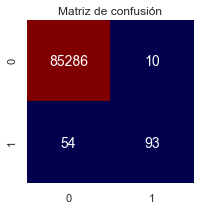

In [185]:
conf = pd.DataFrame(conf, range(2),range(2))
fig = plt.figure(figsize = (3, 3))
sns.heatmap(conf, annot=True, fmt='g', annot_kws={"size": 14}, cmap='seismic', cbar=False)
plt.title('Matriz de confusión');

#### 6.1.6 validación cruzada de K iteraciones (K-fold cross-validation)

Para evaluar el rendimiento del modelo de regresión logística para todo el conjunto de datos y no sólo para el conjunto de test (p. ej., el 30%).

In [189]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
metrica = 'accuracy'
results = model_selection.cross_val_score(logreg, X_train, y_train, cv=kfold, scoring=metrica)
print("Validación cruzada de 10 iteraciones, promedio de exactitud: %.3f" % (results.mean()))

Validación cruzada de 10 iteraciones, promedio de exactitud: 0.999


#### 6.1.7 Curvas

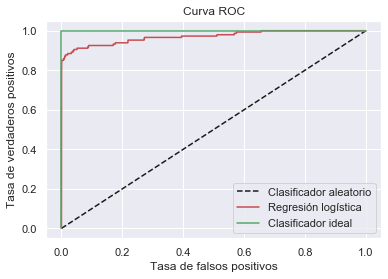

AUC = 0.8162679112162592


In [197]:
from sklearn.metrics import roc_curve,roc_auc_score
# Calcular TFP, TVP, thresholds y roc auc
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--', label='Clasificador aleatorio')
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr,'r-', label='Regresión logística')
plt.plot([0,0,1],[0,1,1],'g-',label='Clasificador ideal')
plt.title('Curva ROC')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.legend(loc="lower right")
plt.show()
print('AUC =',roc_auc)

In [194]:
logreg.predict_proba(X_test).shape

(85443, 2)

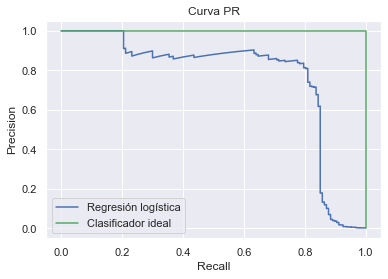

AUC = 0.7674984600433892


In [203]:
from sklearn.metrics import precision_recall_curve,average_precision_score
lr_precision, lr_recall,_ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(lr_recall, lr_precision, label='Regresión logística')
plt.plot([1,1,0],[0,1,1],'g-',label='Clasificador ideal')
plt.title('Curva PR')
plt.xlabel('Recall')
plt.ylabel('Precision');
plt.legend(loc="lower left")
plt.show()
print('AUC =',average_precision_score(y_test, y_pred_prob))

### 6.2 Clasificación con datos balanceados

#### 6.2.1 Sobremuestreo de datos
Se hará un sobremuestreo a la clase minoritaria con SMOTE (**_Synthetic Minority Over-sampling Technique_**), funciona buscando dos vecinos cercanos en una clase minoritaria, produciendo un nuevo punto intermedio entre los dos puntos existentes y añadiendo ese nuevo punto a la muestra (rasgos continuos).

In [227]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4001,kind='regular')
X_train_sob, y_train_sob = sm.fit_sample(X_train, y_train)
pd.value_counts(y_train_res)

1    199019
0    199019
dtype: int64

<div class="alert alert-block alert-success">
Nota: el algoritmo <b>SMOTE</b> ha sobremuestreado las instancias de las minorías y las ha hecho iguales a las de la clase mayoritaria. Ambas categorías tienen la misma cantidad de registros. Concretamente, la clase minoritaria se ha incrementado hasta el número total de clases mayoritarias.
Ahora calcular la precisión y sensibilidad después de aplicar el algoritmo SMOTE (sobremuestreo).
</div>

#### 6.2 Predicción y evaluación - Conjunto remuestreado
A continuación se usará la regresión logística para probar el rendimiento en el mismo conjunto de validación.

In [228]:
logreg_sob = LogisticRegression(solver='lbfgs',random_state=5001)
logreg_sob.fit(X_train_sob,y_train_sob)
y_pred_sob = logreg_sob.predict(X_test)

In [229]:
# Imprimir el reporte de clasificación 
print(classification_report(y_test, y_pred_sob)) 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



Se ha reducido la exactitud al 98% en comparación con el modelo anterior, pero el valor de sensibilidad de la clase minoritaria ha mejorado al 92%. Este es un buen modelo comparado con el anterior. La sensibilidad es excelente.

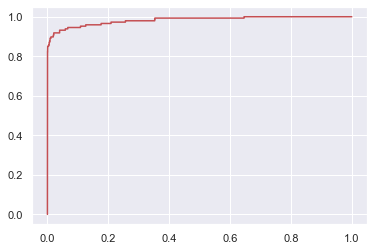

AUC = 0.9469380816479658


In [230]:
y_pred_prob_sob = logreg_sob.predict_proba(X_test)[:,1]
fpr_res, tpr_res, thresholds_res = roc_curve(y_test, y_pred_prob_sob)
plt.plot(fpr_res, tpr_res,'r-', label='Regresión logística')
roc_auc = roc_auc_score(y_test, y_pred_res)
plt.show()
print('AUC =',roc_auc)

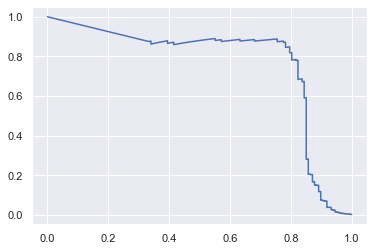

AUC = 0.748459814155975


In [226]:
lr_precision_sob, lr_recall_sob,_ = precision_recall_curve(y_test, y_pred_prob_sob)
plt.plot(lr_recall_sob, lr_precision_sob, label='Logistic')
plt.show()
print('AUC =',average_precision_score(y_test, y_pred_prob_sob))

#### 6.2.2 Submuestreo de datos
El algoritmo `NearMiss` es una técnica de submuestreo que se basa en el clasificador KNN.

In [231]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_sub, y_train_sub = nr.fit_sample(X_train, y_train) 
pd.value_counts(y_train_miss)

1    345
0    345
dtype: int64

In [232]:
# Entrenar el modelo
logreg2 = LogisticRegression(solver='lbfgs',random_state=1)
logreg2.fit(X_train_sub, y_train_sub) 
y_pred_sub = logreg2.predict(X_test) 
  
# Imprimir el reporte de clasificación 
print(classification_report(y_test, y_pred_sub)) 

              precision    recall  f1-score   support

           0       1.00      0.51      0.68     85296
           1       0.00      0.95      0.01       147

    accuracy                           0.51     85443
   macro avg       0.50      0.73      0.34     85443
weighted avg       1.00      0.51      0.68     85443



#### 6.2.3 Usando `Class Weight`

In [238]:
lr_balanced = LogisticRegression(class_weight = 'balanced')
lr_balanced.fit(X_train,y_train)
y_balanced_pred = lr_balanced.predict(X_test)
print(recall_score(y_test,y_balanced_pred))
print(accuracy_score(y_test,y_balanced_pred))

C:\Users\pvelarde\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9115646258503401
0.9772362861790902


In [ ]:
%reset -f